In [ ]:
# STEP 1: Import required libraries
import pandas as pd
import numpy as np

# STEP 2: Mount Google Drive (if file is there) OR Upload manually
from google.colab import files
uploaded = files.upload()  # You'll select the CSV file here

# STEP 3: Load the CSV file
df = pd.read_csv(next(iter(uploaded)))

# STEP 4: Display basic info
print("Shape of dataset:", df.shape)
df.head()


Saving Time-Wasters on Social Media.csv to Time-Wasters on Social Media.csv
Shape of dataset: (1000, 31)


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [ ]:
# STEP 5: Drop irrelevant columns
columns_to_drop = [
    'Debt', 'Demographics', 'Video ID', 'Video Category',
    'Video Length', 'Current Activity'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("Remaining columns:", df.columns.tolist())


Remaining columns: ['UserID', 'Age', 'Gender', 'Location', 'Income', 'Owns Property', 'Profession', 'Platform', 'Total Time Spent', 'Number of Sessions', 'Engagement', 'Importance Score', 'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate', 'Frequency', 'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS', 'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity', 'ConnectionType']


In [ ]:
# STEP 6: Missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# STEP 7: Data types
print("\nData Types:\n")
print(df.dtypes)



Missing Values:

UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Owns Property               0
Profession                  0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

Data Types:

UserID                       int64
Age                          int64
Gender                      object
Location                    object
Income                       int64


In [ ]:
# Fix country name typo
df['Location'] = df['Location'].replace('Barzil', 'Brazil')

# Check for similar column name to 'Device Type'
print("\nColumn names in the dataset:")
print(df.columns.tolist())



Column names in the dataset:
['UserID', 'Age', 'Gender', 'Location', 'Income', 'Owns Property', 'Profession', 'Platform', 'Total Time Spent', 'Number of Sessions', 'Engagement', 'Importance Score', 'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate', 'Frequency', 'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS', 'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity', 'ConnectionType']


In [ ]:
# Print all column names with index numbers
print("Full list of column names:\n")
for idx, col in enumerate(df.columns):
    print(f"{idx}: '{col}'")


Full list of column names:

0: 'UserID'
1: 'Age'
2: 'Gender'
3: 'Location'
4: 'Income'
5: 'Owns Property'
6: 'Profession'
7: 'Platform'
8: 'Total Time Spent'
9: 'Number of Sessions'
10: 'Engagement'
11: 'Importance Score'
12: 'Time Spent On Video'
13: 'Number of Videos Watched'
14: 'Scroll Rate'
15: 'Frequency'
16: 'ProductivityLoss'
17: 'Satisfaction'
18: 'Watch Reason'
19: 'DeviceType'
20: 'OS'
21: 'Watch Time'
22: 'Self Control'
23: 'Addiction Level'
24: 'CurrentActivity'
25: 'ConnectionType'


In [ ]:
# Rename compact/combined column names for clarity
df.rename(columns={
    'DeviceType': 'Device Type',
    'ConnectionType': 'Connection Type',
    'ProductivityLoss': 'Productivity Loss',
    'CurrentActivity': 'Current Activity'
}, inplace=True)

# Now test again
print("\nUnique values in 'Device Type':")
print(df['Device Type'].unique())

print("\nUnique values in 'Connection Type':")
print(df['Connection Type'].unique())



Unique values in 'Device Type':
['Smartphone' 'Computer' 'Tablet']

Unique values in 'Connection Type':
['Mobile Data' 'Wi-Fi']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Pretty plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


/tmp/ipython-input-3382899393.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Addiction Level', palette='Set2')


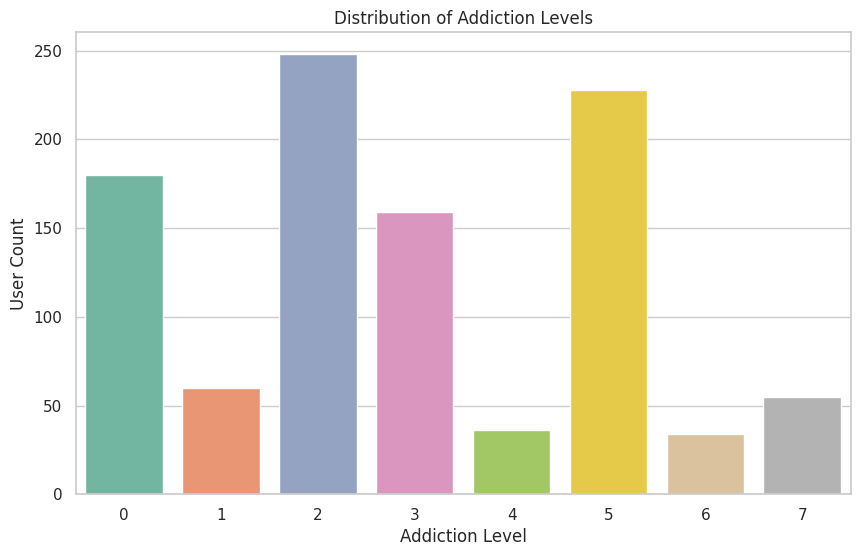

In [ ]:
sns.countplot(data=df, x='Addiction Level', palette='Set2')
plt.title('Distribution of Addiction Levels')
plt.xlabel('Addiction Level')
plt.ylabel('User Count')
plt.show()


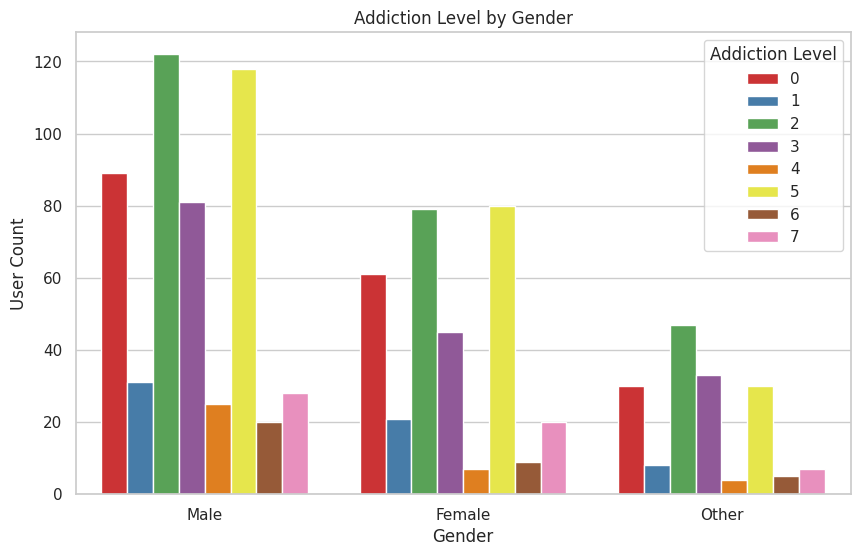

In [ ]:
sns.countplot(data=df, x='Gender', hue='Addiction Level', palette='Set1')
plt.title('Addiction Level by Gender')
plt.xlabel('Gender')
plt.ylabel('User Count')
plt.legend(title='Addiction Level')
plt.show()


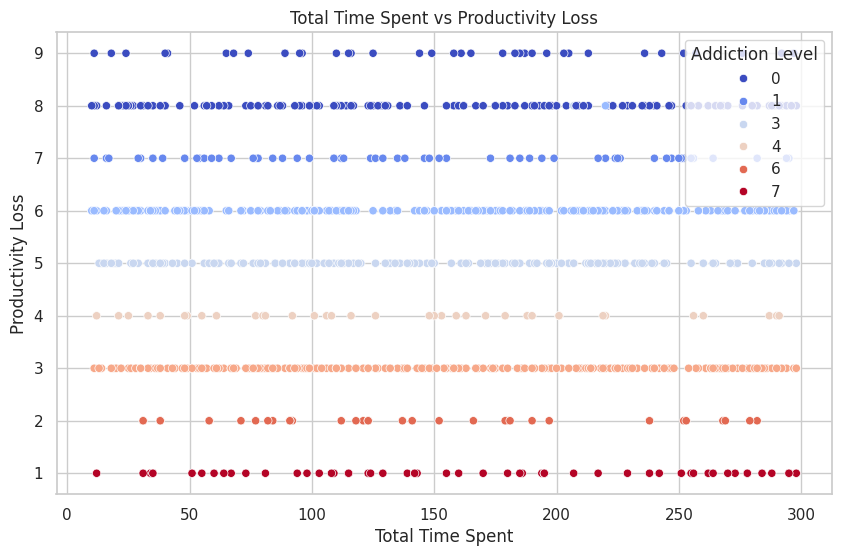

In [ ]:
sns.scatterplot(data=df, x='Total Time Spent', y='Productivity Loss', hue='Addiction Level', palette='coolwarm')
plt.title('Total Time Spent vs Productivity Loss')
plt.xlabel('Total Time Spent')
plt.ylabel('Productivity Loss')
plt.show()


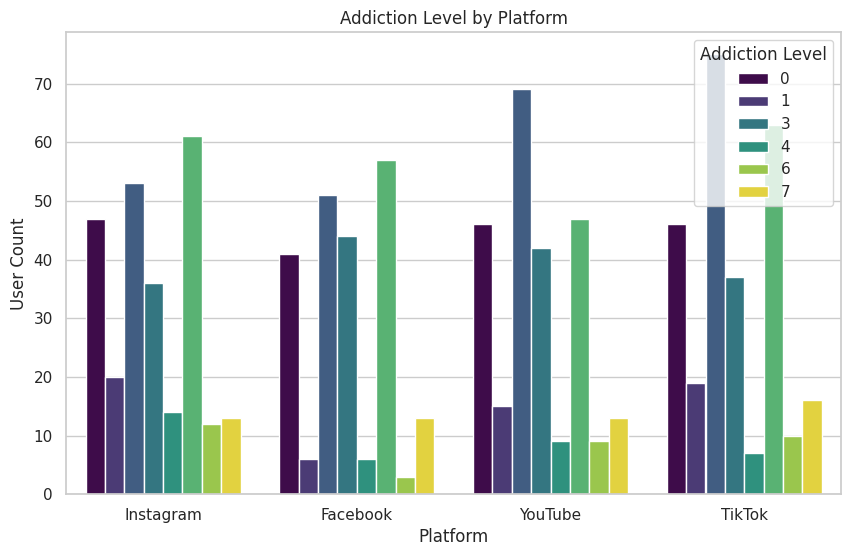

In [ ]:
sns.countplot(data=df, x='Platform', hue='Addiction Level', palette='viridis')
plt.title('Addiction Level by Platform')
plt.xlabel('Platform')
plt.ylabel('User Count')
plt.legend(title='Addiction Level')
plt.show()


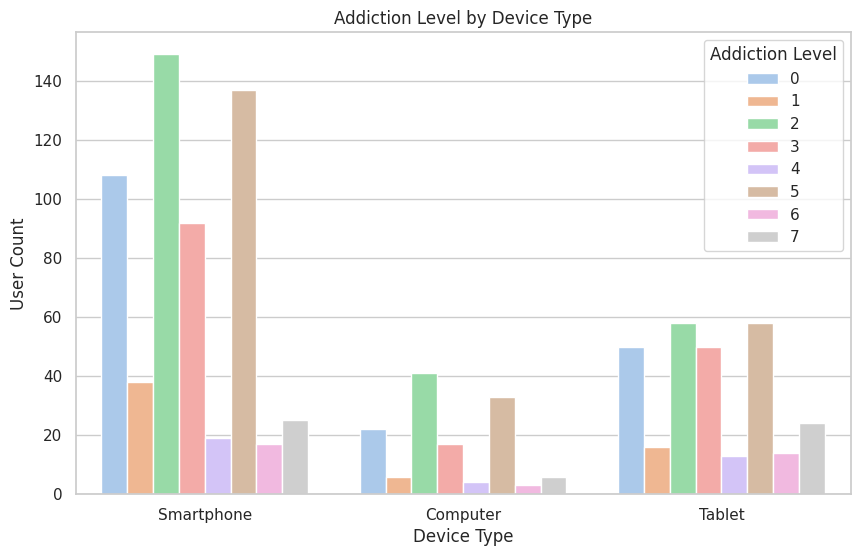

In [ ]:
sns.countplot(data=df, x='Device Type', hue='Addiction Level', palette='pastel')
plt.title('Addiction Level by Device Type')
plt.xlabel('Device Type')
plt.ylabel('User Count')
plt.legend(title='Addiction Level')
plt.show()


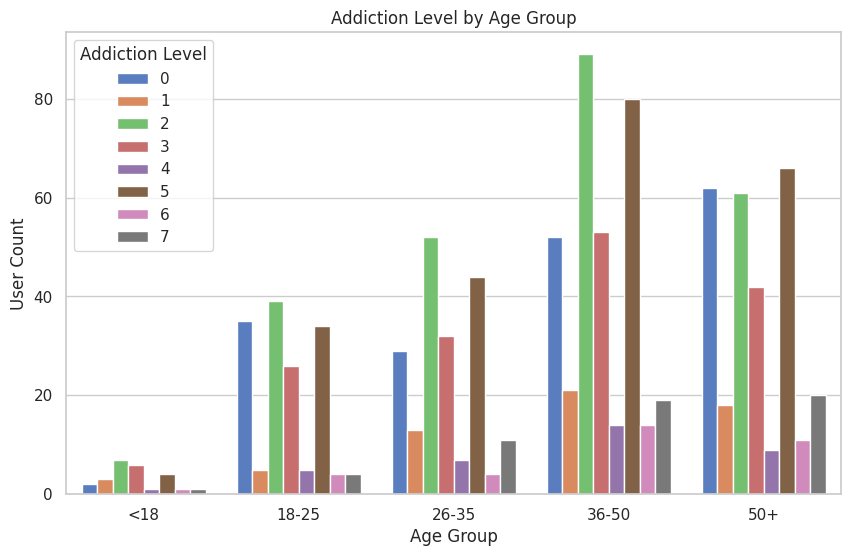

In [ ]:
# Create age bins
bins = [10, 18, 25, 35, 50, 70]
labels = ['<18', '18-25', '26-35', '36-50', '50+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot
sns.countplot(data=df, x='Age Group', hue='Addiction Level', palette='muted')
plt.title('Addiction Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('User Count')
plt.legend(title='Addiction Level')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Copy dataset to avoid modifying original
df_model = df.copy()

# Label encode categorical columns
label_cols = ['Gender', 'Platform', 'Device Type', 'OS', 'Watch Reason',
              'Addiction Level', 'Profession', 'Location', 'Connection Type']

le = LabelEncoder()
for col in label_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Drop UserID and other non-relevant identifiers
df_model.drop(columns=['UserID', 'Current Activity', 'Watch Time'], inplace=True, errors='ignore')

# Features and Target
X = df_model.drop('Addiction Level', axis=1)
y = df_model['Addiction Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
df_model.drop(columns=['Watch Time'], inplace=True, errors='ignore')


In [ ]:
X = df_model.drop('Addiction Level', axis=1)
y = df_model['Addiction Level']


In [ ]:
print(combined.columns.tolist())


['Age', 'Gender', 'Location', 'Income', 'Owns Property', 'Profession', 'Platform', 'Total Time Spent', 'Number of Sessions', 'Engagement', 'Importance Score', 'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate', 'Frequency', 'Productivity Loss', 'Satisfaction', 'Watch Reason', 'Device Type', 'OS', 'Watch Time', 'Self Control', 'Current Activity', 'Connection Type', 'Age Group']


In [ ]:
print("Columns in combined dataframe:")
print(combined.columns.tolist())

# Use exact column names with spaces
ohe_cols = [
    'Gender', 'Location', 'Profession', 'Platform', 'Watch Reason',
    'Device Type', 'OS', 'Watch Time', 'Current Activity', 'Connection Type'
]

# Check which of these columns are actually in combined dataframe
missing_cols = [col for col in ohe_cols if col not in combined.columns]
print("Columns missing in combined dataframe:", missing_cols)


Columns in combined dataframe:
['Age', 'Gender', 'Location', 'Income', 'Owns Property', 'Profession', 'Platform', 'Total Time Spent', 'Number of Sessions', 'Engagement', 'Importance Score', 'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate', 'Frequency', 'Productivity Loss', 'Satisfaction', 'Watch Reason', 'Device Type', 'OS', 'Watch Time', 'Self Control', 'Current Activity', 'Connection Type', 'Age Group']
Columns missing in combined dataframe: []


In [ ]:
watch_time_order = {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}
if 'Watch Time' in combined.columns:
    combined['Watch Time'] = combined['Watch Time'].map(watch_time_order)


In [ ]:
# Use only columns confirmed present in combined for one-hot encoding, excluding 'Watch Time' because it's ordinal now
ohe_cols_to_encode = [col for col in ohe_cols if col != 'Watch Time' and col in combined.columns]

combined_encoded = pd.get_dummies(combined, columns=ohe_cols_to_encode)


In [ ]:
X_train_encoded = combined_encoded.iloc[:len(X_train), :]
X_test_encoded = combined_encoded.iloc[len(X_train):, :]


In [ ]:
print("Final columns before encoding:")
print(combined.columns.tolist())


Final columns before encoding:
['Age', 'Gender', 'Location', 'Income', 'Owns Property', 'Profession', 'Platform', 'Total Time Spent', 'Number of Sessions', 'Engagement', 'Importance Score', 'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate', 'Frequency', 'Productivity Loss', 'Satisfaction', 'Watch Reason', 'Device Type', 'OS', 'Watch Time', 'Self Control', 'Current Activity', 'Connection Type', 'Age Group']


In [ ]:
# Assuming X_train and X_test were previously defined and combined properly

X_train_encoded = combined_encoded.iloc[:len(X_train), :]
X_test_encoded = combined_encoded.iloc[len(X_train):, :]

print("X_train_encoded shape:", X_train_encoded.shape)
print("X_test_encoded shape:", X_test_encoded.shape)


X_train_encoded shape: (800, 59)
X_test_encoded shape: (200, 59)


In [ ]:
print(X_train_encoded.dtypes)


Age                                int64
Income                             int64
Owns Property                       bool
Total Time Spent                   int64
Number of Sessions                 int64
Engagement                         int64
Importance Score                   int64
Time Spent On Video                int64
Number of Videos Watched           int64
Scroll Rate                        int64
Frequency                         object
Productivity Loss                  int64
Satisfaction                       int64
Watch Time                       float64
Self Control                       int64
Age Group                       category
Gender_Female                       bool
Gender_Male                         bool
Gender_Other                        bool
Location_Brazil                     bool
Location_Germany                    bool
Location_India                      bool
Location_Indonesia                  bool
Location_Japan                      bool
Location_Mexico 

In [ ]:
age_order = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
combined['Age Group'] = pd.Categorical(combined['Age Group'], categories=age_order, ordered=True)
combined['Age Group'] = combined['Age Group'].cat.codes  # convert to integers


In [ ]:
# Convert 'Age Group' ordinal category to numeric codes
age_order = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
combined['Age Group'] = pd.Categorical(combined['Age Group'], categories=age_order, ordered=True)
combined['Age Group'] = combined['Age Group'].cat.codes


In [ ]:
combined_encoded = pd.get_dummies(combined, columns=ohe_cols)


In [ ]:
age_order = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
combined['Age Group'] = pd.Categorical(combined['Age Group'], categories=age_order, ordered=True)
combined['Age Group'] = combined['Age Group'].cat.codes


In [ ]:
combined_encoded = pd.get_dummies(combined, columns=ohe_cols)  # ohe_cols does NOT include 'Age Group'


In [43]:
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_cols)


['Gender', 'Location', 'Profession', 'Platform', 'Frequency', 'Watch Reason', 'Device Type', 'OS', 'Current Activity', 'Connection Type', 'Age Group']


In [44]:
import pandas as pd

# Combine train and test sets for consistent encoding
combined = pd.concat([X_train, X_test], axis=0)

# One-hot encode categorical columns
combined_encoded = pd.get_dummies(combined, columns=cat_cols)

# Split back into train and test
X_train_encoded = combined_encoded.iloc[:len(X_train), :]
X_test_encoded = combined_encoded.iloc[len(X_train):, :]

# Now fit your model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

# Predict
y_pred = model.predict(X_test_encoded)


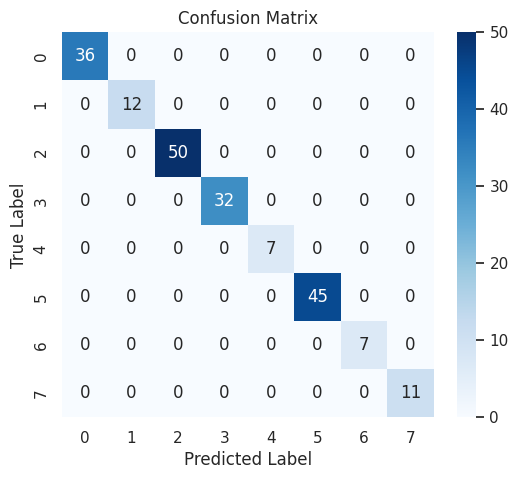

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


/tmp/ipython-input-820084616.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')


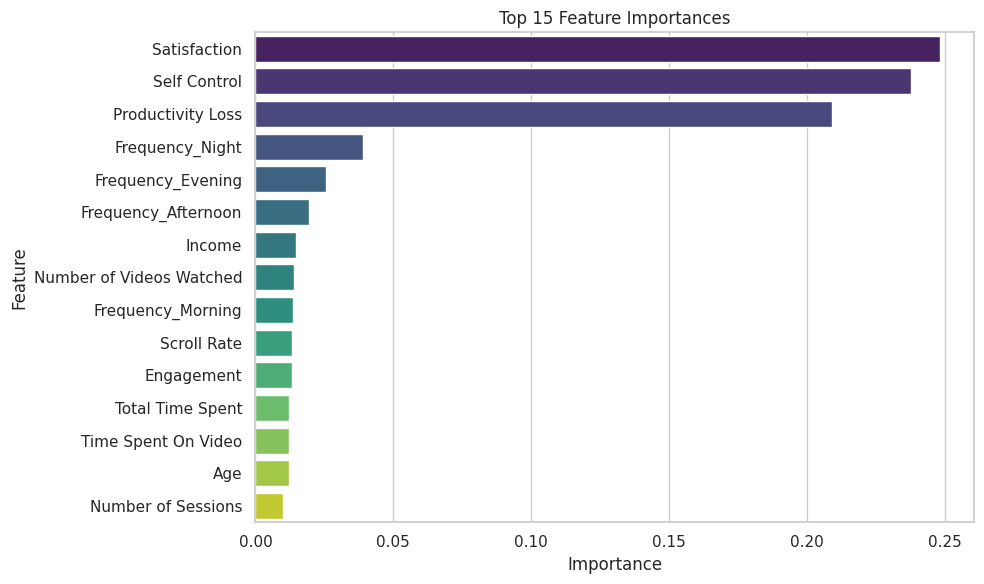

In [47]:
import pandas as pd
import numpy as np

# Get feature importances from the model
importances = model.feature_importances_
feature_names = X_train_encoded.columns

# Create a DataFrame for sorting
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort top 15 important features
top_features = feature_imp_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()


In [48]:
from sklearn.metrics import classification_report

# Print textual report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        11

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



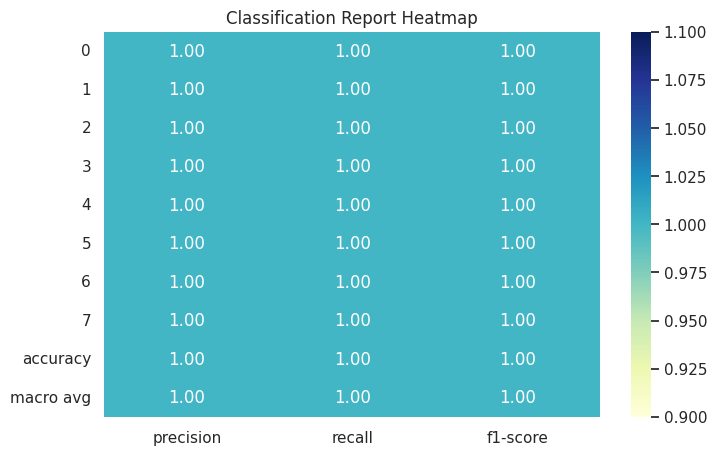

In [49]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, f1-score for each class
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Classification Report Heatmap")
plt.show()


In [50]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


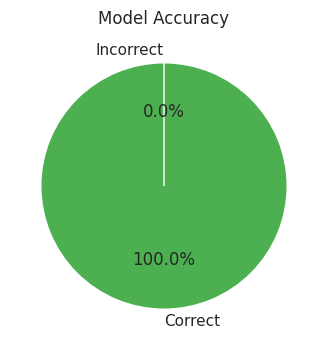

In [51]:
plt.figure(figsize=(4, 4))
plt.pie([accuracy, 1 - accuracy], labels=['Correct', 'Incorrect'], autopct='%1.1f%%',
        colors=['#4CAF50', '#FF5722'], startangle=90)
plt.title('Model Accuracy')
plt.show()


In [52]:
# Combine original test set with predictions
test_results = X_test.copy()
test_results['Actual'] = y_test.values
test_results['Predicted'] = y_pred

# Save to CSV
test_results.to_csv("test_results_with_predictions.csv", index=False)
print("✅ Exported: test_results_with_predictions.csv")


✅ Exported: test_results_with_predictions.csv


In [53]:
importances = model.feature_importances_
features = X_train_encoded.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Save
importance_df.to_csv("feature_importances.csv", index=False)
print("✅ Exported: feature_importances.csv")


✅ Exported: feature_importances.csv


In [54]:
from google.colab import files

# Download the prediction results
files.download("test_results_with_predictions.csv")

# Download the feature importances
files.download("feature_importances.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>